# Predicting Polish demography (total population, year by year), using fertility rate, imigration data and historic population change.
First off, required imports:


In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from ydata_profiling import ProfileReport

# Data to process
First of all, population over the years.
We will take this from [World Bank](https://data.worldbank.org/indicator/SP.POP.TOTL?locations=PL), as they have very recent data, all the way to 2024-03-28.



In [2]:


df = pd.read_csv('Countries_population.csv')

polish_population_df = df[df['Country Name'] == 'Poland']
polish_population_df = polish_population_df.drop(columns=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'])
polish_population_df.dropna(axis='columns',inplace=True)
polish_population_df.index=['Population']
polish_population_df=polish_population_df.T
polish_population_df


,Population
1960,29637450.0
1961,29964000.0
1962,30308500.0
1963,30712000.0
1964,31139450.0
...,...
2018,37974750.0
2019,37965475.0
2020,37899070.0
2021,37747124.0


Lets graph those values:

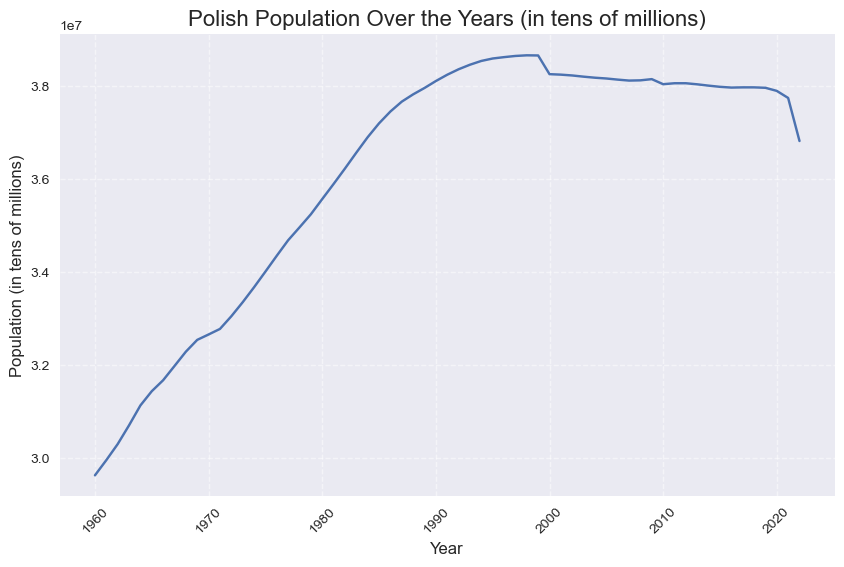

In [3]:


plt.style.use('seaborn-v0_8')

ax = polish_population_df.plot(figsize=(10, 6), legend=False)

ax.set_title('Polish Population Over the Years (in tens of millions)', fontsize=16)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Population (in tens of millions)', fontsize=12)

ax.tick_params(axis='x', labelrotation=45)
ax.tick_params(axis='both', labelsize=10)

ax.grid(True, linestyle='--', alpha=0.5)

plt.savefig('polish_population_over_the_years.png')


# International Migrant Stock
Again now, we will use World Bank data. This time, however, a problem arises - data is only colected every 5 years or so, and thus we must interpolate. I have decided to use linear interpolation from pandas.

In [4]:
df = pd.read_csv('Countries_migrant_stock.csv')

polish_migrant_stock = df[df['Country Name'] == 'Poland']
polish_migrant_stock = polish_migrant_stock.drop(columns=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'])
polish_migrant_stock.index=['International Migrant Stock']
#Because of the missing data (it is recorder only around 5 years or so we will interpolate the data
polish_migrant_stock.interpolate(method='linear', axis=1, inplace=True)
polish_population_df.dropna(axis='index',inplace=True)
polish_migrant_stock=polish_migrant_stock.T
polish_migrant_stock.drop(polish_migrant_stock.tail(2).index,inplace=True)
polish_migrant_stock

,International Migrant Stock
1960,2424881.0
1961,2389838.4
1962,2354795.8
1963,2319753.2
1964,2284710.6
...,...
2018,619403.0
2019,619403.0
2020,619403.0
2021,619403.0


Here is how it looks on a graph:

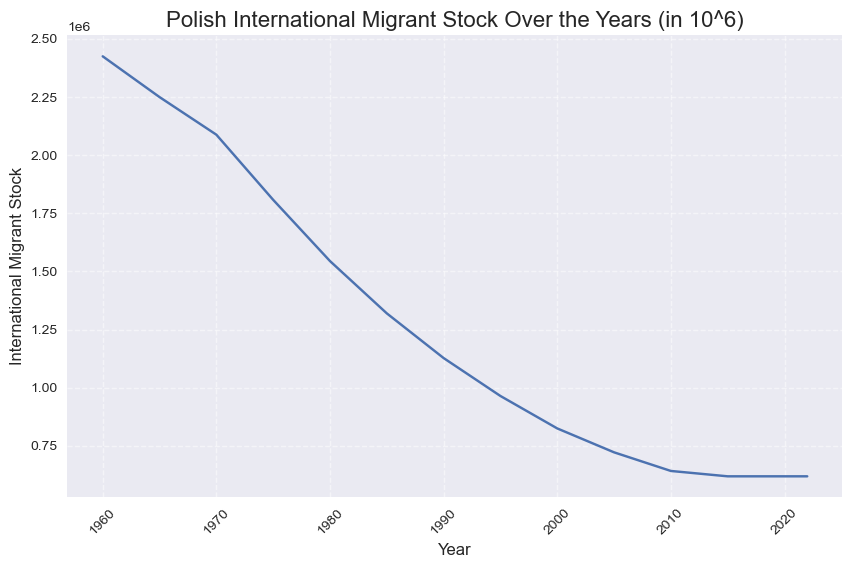

In [5]:


plt.style.use('seaborn-v0_8')

ax = polish_migrant_stock.plot(figsize=(10, 6), legend=False)

ax.set_title('Polish International Migrant Stock Over the Years (in 10^6)', fontsize=16)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('International Migrant Stock', fontsize=12)

ax.tick_params(axis='x', labelrotation=45)
ax.tick_params(axis='both', labelsize=10)

ax.grid(True, linestyle='--', alpha=0.5)

plt.savefig('polish_int_migrant_stock_over_the_years.png')


# Fertility rate per woman
Once again, courtesy of World Bank we can find the most important statistic for population change - fertility rate.

In [6]:
df = pd.read_csv('Countries_fertility_rate.csv')

polish_fertility_rate = df[df['Country Name'] == 'Poland']
polish_fertility_rate = polish_fertility_rate.drop(columns=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'])
polish_fertility_rate.index=['Fertility Rate (per women)']
#Because of the missing data (it is recorder only around 5 years or so we will interpolate the data
polish_fertility_rate.interpolate(method='linear', axis=1, inplace=True)
polish_fertility_rate.dropna(axis='index',inplace=True)
polish_fertility_rate=polish_fertility_rate.T
polish_fertility_rate.drop(polish_fertility_rate.tail(2).index,inplace=True)
polish_fertility_rate

,Fertility Rate (per women)
1960,2.98
1961,2.83
1962,2.72
1963,2.70
1964,2.57
...,...
2018,1.46
2019,1.44
2020,1.39
2021,1.33


Now for the graph:

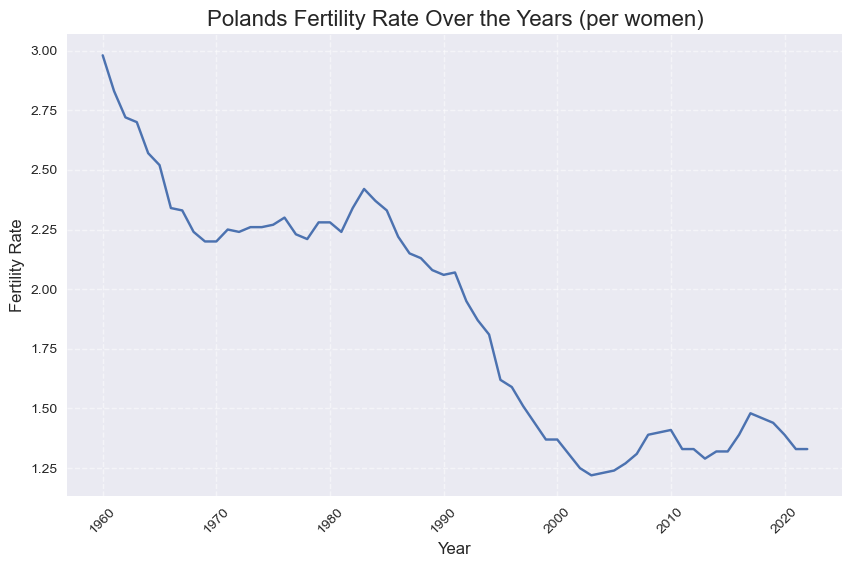

In [7]:


plt.style.use('seaborn-v0_8')

ax = polish_fertility_rate.plot(figsize=(10, 6), legend=False)

ax.set_title('Polands Fertility Rate Over the Years (per women)', fontsize=16)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Fertility Rate', fontsize=12)

ax.tick_params(axis='x', labelrotation=45)
ax.tick_params(axis='both', labelsize=10)

ax.grid(True, linestyle='--', alpha=0.5)

plt.savefig('polish_fertility_rate.png')


# Life expentancy at birth
Another variable, life expentancy at birth, once again sourced from World Bank:

In [8]:
df = pd.read_csv('Countries_life_expentancy_ab.csv')

polish_life_expentancy = df[df['Country Name'] == 'Poland']
polish_life_expentancy = polish_life_expentancy.drop(columns=['Country Name', 'Country Code', 'Indicator Name', 'Indicator Code'])
polish_life_expentancy.index=['Life Expentancy at Birth (years)']
#Because of the missing data (it is recorder only around 5 years or so we will interpolate the data
polish_life_expentancy.interpolate(method='linear', axis=1, inplace=True)
polish_life_expentancy.dropna(axis='index',inplace=True)
polish_life_expentancy=polish_life_expentancy.T
polish_life_expentancy.drop(polish_life_expentancy.tail(2).index,inplace=True)

Plotting time:

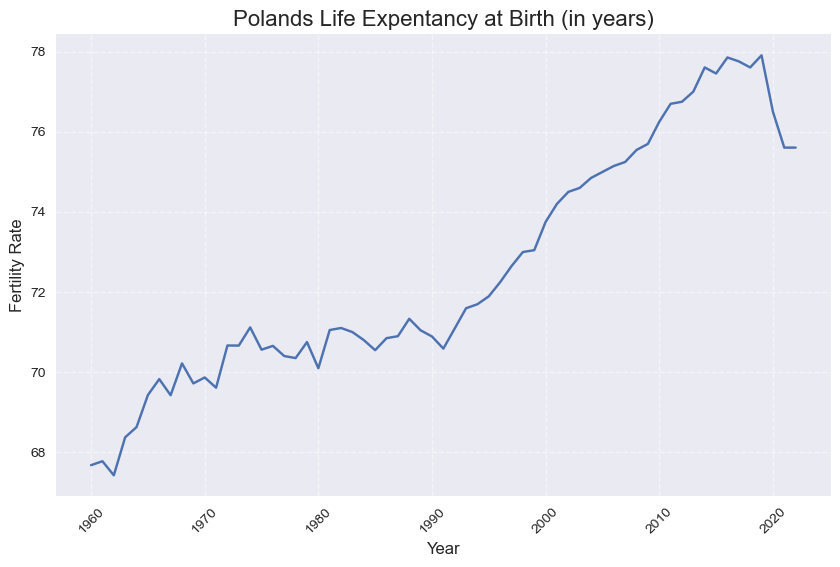

In [9]:
plt.style.use('seaborn-v0_8')

ax = polish_life_expentancy.plot(figsize=(10, 6), legend=False)

ax.set_title('Polands Life Expentancy at Birth (in years)', fontsize=16)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Fertility Rate', fontsize=12)

ax.tick_params(axis='x', labelrotation=45)
ax.tick_params(axis='both', labelsize=10)

ax.grid(True, linestyle='--', alpha=0.5)

plt.savefig('polish_life_expentancy.png')

# Urbanization level of Poland
During the research, finding the urbanization level was exceedingly hard. I found the best source at last at [Zintegrowana Platforma Edukacyjna Ministerstwa Edukacji Narodowej](https://zpe.gov.pl/a/zroznicowanie-poziomu-urbanizacji-w-polsce/D19MUchJD), but the only acceptable data was presented in a way of an image.  
I have decided to [scrape](scrape_image.py) it, and the proceed to use [WebPlot Digitizer](https://automeris.io/WebPlotDigitizer.html) in order to turn it into analyzable form of .csv file.  
It would soon become clear that WebPlot Digitizer did a correct, but not flawlessm, job of turning the image into a file.<br> Instead of treating years as the distinc values that they are, it created them in the form of continouus values.<br>It was nothing a quick python script could not fix however, named [python_fitter](python_fitter.py) with function modify_file that truncates real part of years and unifies them.<br>
Now, it must be noted that data only goes up all the way to 2012 - considering those were just a few years I have decided to enter them manually from [Geografia24](https://geografia24.pl/urbanizacja-w-polsce-i-w-europie/) to the file.

In [10]:
from python_fitter import modify_file
from scrape_image import download_image
#Image sraping
download_image("https://static.zpe.gov.pl/portal/f/res-minimized/R1DRpEwOu0kly/4/fYPhB0sYKSWe5DLdlULEQRUZjaP4NGsL.png","urbanizacjawPolsce.png")
#Csv modification, image -> csv was done externally
modify_file("urbanization_analyzed")

Downloaded image successfully - urbanizacjawPolsce.png
Downloaded image successfully - urbanizacjawPolsce.png


In [11]:
df = pd.read_csv('urbanization_analyzed_modified.csv')
df.reset_index(drop=True, inplace=True)
polish_urbanization = df
polish_urbanization=polish_urbanization.drop(polish_urbanization.index[:14])
polish_urbanization.set_index('Year', inplace=True)
polish_urbanization.index.name = None
polish_urbanization.index = polish_urbanization.index.astype(str)
polish_urbanization.index = polish_urbanization.index.astype(object)
polish_urbanization


,Urbanization
1960,47.668335
1961,47.899164
1962,48.063771
1963,48.246360
1964,48.386846
...,...
2018,58.897383
2019,58.693046
2020,58.488708
2021,58.284371


# Here is the plot:

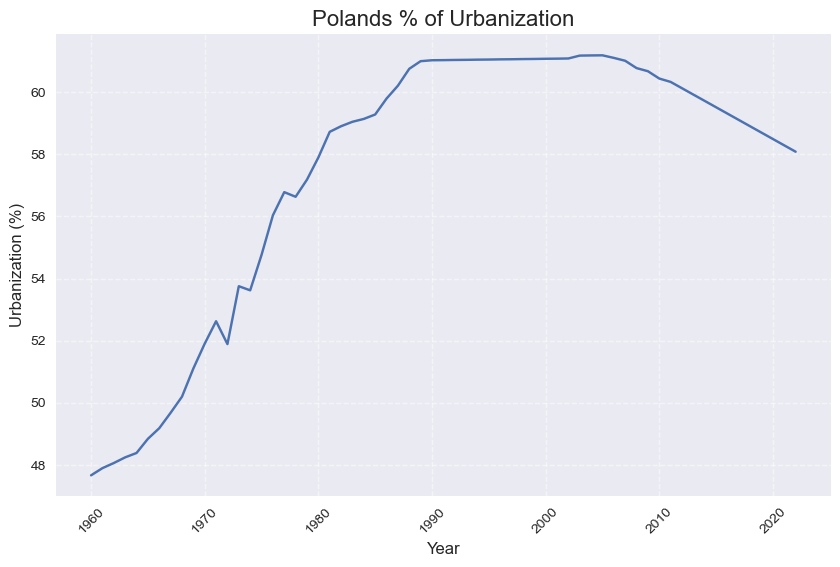

In [12]:
plt.style.use('seaborn-v0_8')

ax = polish_urbanization.plot(figsize=(10, 6), legend=False)

ax.set_title(r'Polands % of Urbanization', fontsize=16)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Urbanization (%)', fontsize=12)

ax.tick_params(axis='x', labelrotation=45)
ax.tick_params(axis='both', labelsize=10)

ax.grid(True, linestyle='--', alpha=0.5)

plt.savefig('polish_urbanization.png')

# A useful metric might also be population growth over last 5 years.
There is no need to source this data, as we will take it from historic population, and for first 5 years we will just keep it at 0.

In [13]:
pop_change = polish_population_df.pct_change(periods=5)
pop_change = pop_change.fillna(0)
pop_change=pop_change*100
pop_change = pop_change.rename(columns={'Population': 'Population Change (%)'})
pop_change

,Population Change (%)
1960,0.000000
1961,0.000000
1962,0.000000
1963,0.000000
1964,0.000000
...,...
2018,-0.172044
2019,-0.121699
2020,-0.229930
2021,-0.587207


# For the graph:

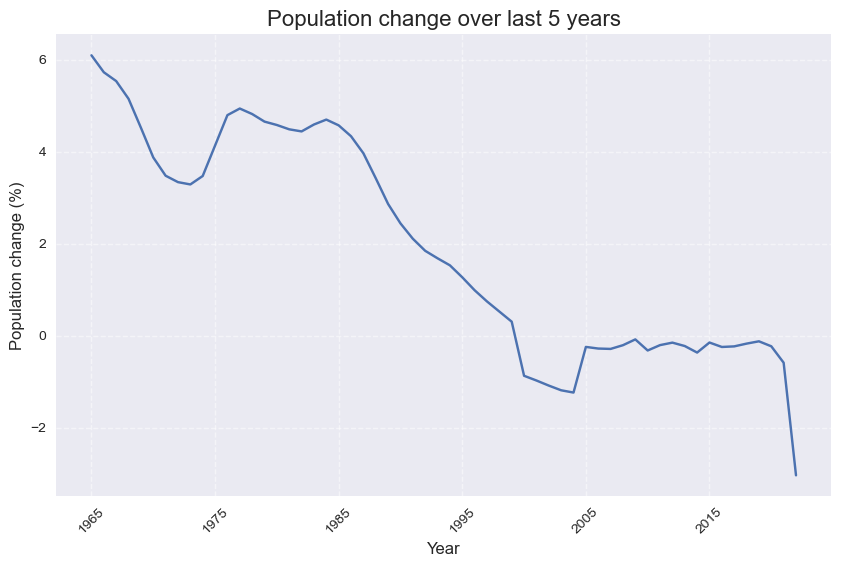

In [14]:
plt.style.use('seaborn-v0_8')

# pokazuj od dobrych danych
filtered_pop_change = pop_change[5:] 

ax = filtered_pop_change.plot(figsize=(10, 6), legend=False)

ax.set_title(r'Population change over last 5 years', fontsize=16)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Population change (%)', fontsize=12)

ax.tick_params(axis='x', labelrotation=45)
ax.tick_params(axis='both', labelsize=10)

ax.grid(True, linestyle='--', alpha=0.5)

plt.savefig('polish_pop_change_5_years.png')

# Lets combine our data into shared Data Frame:

In [26]:
final_data=pd.concat([polish_population_df,polish_migrant_stock,polish_fertility_rate,polish_life_expentancy, polish_urbanization, pop_change],axis=1)
final_data.reset_index(level=0, inplace=True)
final_data.rename(columns={'index': 'Year'}, inplace=True)
final_data.set_index('Year', inplace=True)
final_data.style.hide(axis="index")
final_data

,Population,International Migrant Stock,Fertility Rate (per women),Life Expentancy at Birth (years),Urbanization,Population Change (%)
Year,,,,,,
1960,29637450.0,2424881.0,2.98,67.680488,47.668335,0.000000
1961,29964000.0,2389838.4,2.83,67.778049,47.899164,0.000000
1962,30308500.0,2354795.8,2.72,67.426829,48.063771,0.000000
1963,30712000.0,2319753.2,2.70,68.375610,48.246360,0.000000
1964,31139450.0,2284710.6,2.57,68.629268,48.386846,0.000000
...,...,...,...,...,...,...
2018,37974750.0,619403.0,1.46,77.602439,58.897383,-0.172044
2019,37965475.0,619403.0,1.44,77.904878,58.693046,-0.121699
2020,37899070.0,619403.0,1.39,76.500000,58.488708,-0.229930


# At last we can begin analysing our data:

Raport for presented data:

In [22]:
raport = ProfileReport(final_data, title="Profiling Report")
raport.to_file("final_profiling_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

[As we can see on the report](final_profiling_report.html) there is a very high correlation of our data, which bodes well for our analysis. 
# However a challange arises.
Data frame contains non-normalized values - in one index population values can be as high as 3800000, but fertility rate as low as 1.2. This can, however, be solved using scaler from sckit-learn.
Lets graph it all for better visualisation:

In [31]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn-v0_8',
 'seaborn-v0_8-bright',
 'seaborn-v0_8-colorblind',
 'seaborn-v0_8-dark',
 'seaborn-v0_8-dark-palette',
 'seaborn-v0_8-darkgrid',
 'seaborn-v0_8-deep',
 'seaborn-v0_8-muted',
 'seaborn-v0_8-notebook',
 'seaborn-v0_8-paper',
 'seaborn-v0_8-pastel',
 'seaborn-v0_8-poster',
 'seaborn-v0_8-talk',
 'seaborn-v0_8-ticks',
 'seaborn-v0_8-white',
 'seaborn-v0_8-whitegrid',
 'tableau-colorblind10']

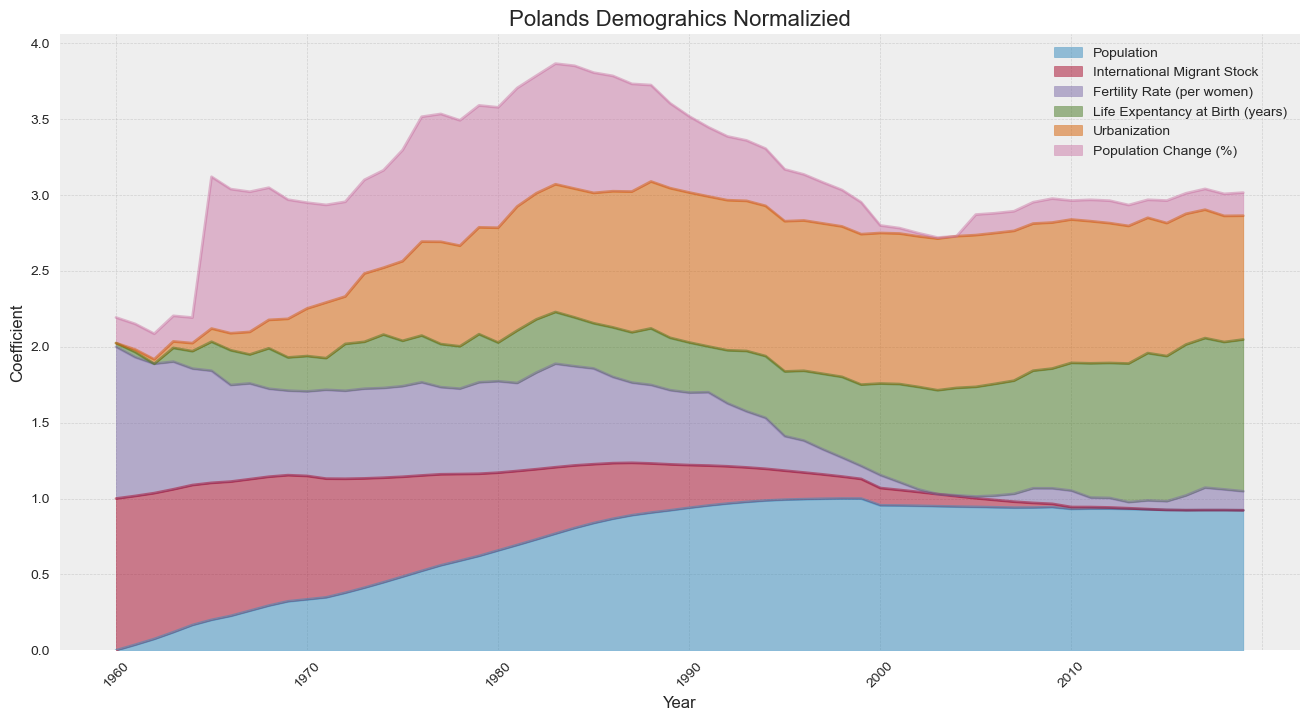

In [43]:
plt.style.use('bmh')
# Data scaling - otherwise the data would be hard to read!
scaler= MinMaxScaler()
final_data_scaled = pd.DataFrame(scaler.fit_transform(final_data), columns=final_data.columns, index=final_data.index)
ax = final_data_scaled.plot(figsize=(16, 8), legend=True, kind='area', alpha=0.5)

ax.set_title('Polands Demograhics Normalizied', fontsize=16)
ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Coefficient', fontsize=12)
ax.tick_params(axis='x', labelrotation=45)
ax.tick_params(axis='both', labelsize=10)
ax.grid(True, linestyle='--', alpha=0.5)

plt.savefig('poliand_demographics_statistics.png')

# Data anomaly 
It does not take an eagle sight to notice a slight data anomaly towards 2019 - it is likely to be caused by COVID-19 pandemic.<br>
For scientific purposes lets drop the data from 2019 onwards.

In [28]:
if(len(final_data)==63):
    final_data = final_data.drop(final_data.index[-3:])
final_data

,Population,International Migrant Stock,Fertility Rate (per women),Life Expentancy at Birth (years),Urbanization,Population Change (%)
Year,,,,,,
1960,29637450.0,2424881.0,2.98,67.680488,47.668335,0.000000
1961,29964000.0,2389838.4,2.83,67.778049,47.899164,0.000000
1962,30308500.0,2354795.8,2.72,67.426829,48.063771,0.000000
1963,30712000.0,2319753.2,2.70,68.375610,48.246360,0.000000
1964,31139450.0,2284710.6,2.57,68.629268,48.386846,0.000000
1965,31444950.0,2249668.0,2.52,69.429268,48.842799,6.098703
1966,31681000.0,2217339.8,2.34,69.826829,49.184288,5.730210
1967,31987155.0,2185011.6,2.33,69.424390,49.680442,5.538562
1968,32294655.0,2152683.4,2.24,70.219512,50.198814,5.153214


# Time to get to work!
With data now ready, its time to test diffrent models, and see how they are doing

Model: Linear Regression
Prediction: [38219967.55285636 38223074.04160628 37963985.92416175 37853667.97897521
 37826860.73783548 37722272.39202762 37391167.90108511 37481789.32428303
 37192886.71071953 37127528.19699016 37187364.05437415 37042687.79007526]
Coefficients: [-4.71829996e+00 -8.49131753e+05 -4.47291496e+05  1.69631824e+05
  1.64497525e+05]
Len: 12
Mean Squared Error: 304520811129.2392
R-squared: -84.9715456639543
Mean Absolute Percentage Error: 0.01199326404460288



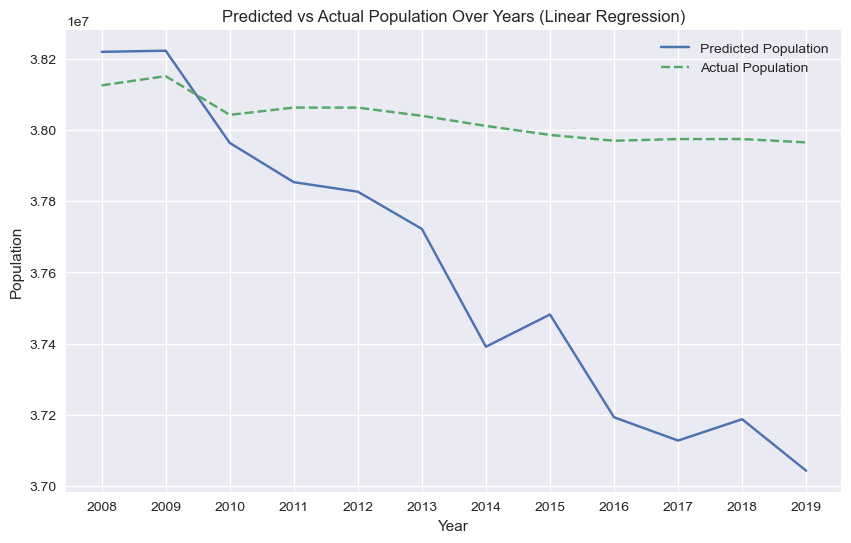

Model: Ridge Regression
Prediction: [38436057.16089644 38467382.94266712 38276727.37883762 38168016.36625129
 38153933.76210724 38058463.47341122 37805793.43543749 37890984.15267177
 37682466.35478177 37663883.13191576 37705717.3758475  37583564.40040281]
Coefficients: [-5.10334136e+00 -3.04096665e+05 -3.57976181e+05  1.38095755e+05
  1.63853051e+05]
Len: 12
Mean Squared Error: 59953192042.41915
R-squared: -15.925833634362608
Mean Absolute Percentage Error: 0.005751601255643875



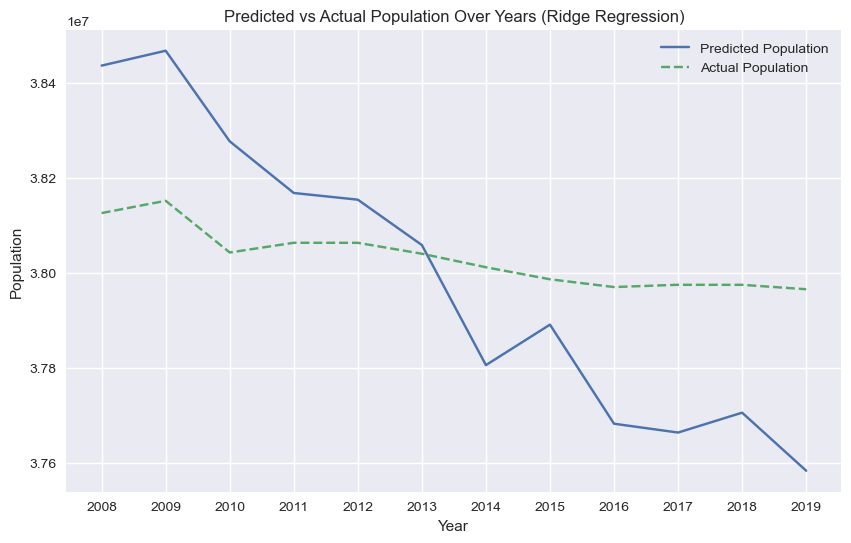

Model: Lasso Regression
Prediction: [38220003.71331194 38223115.12707166 37964037.81920031 37853719.77129672
 37826915.00050663 37722328.13564394 37391235.75755931 37481857.13811962
 37192967.21384918 37127616.81127231 37187450.39243908 37042777.68410426]
Coefficients: [-4.71838345e+00 -8.49043377e+05 -4.47278630e+05  1.69624943e+05
  1.64498041e+05]
Len: 12
Mean Squared Error: 304453472181.20435
R-squared: -84.95253470235706
Mean Absolute Percentage Error: 0.011991909392600024



c:\Users\krzys\miniconda3\envs\msid\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.197e+12, tolerance: 4.039e+10
  model = cd_fast.enet_coordinate_descent(


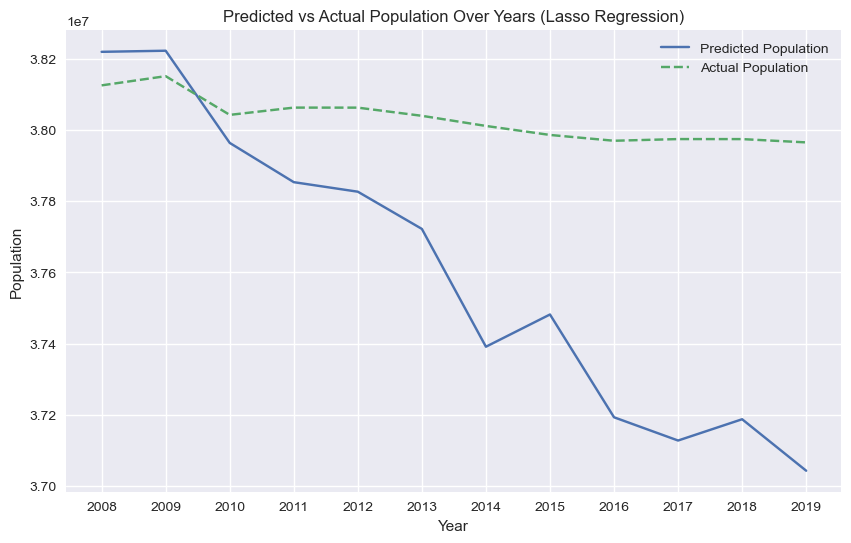

Model: Elastic Net
Prediction: [38726773.06668256 38775819.25609878 38678281.07263225 38615604.71686018
 38604273.39697531 38536709.40150028 38395807.90626205 38445123.71320661
 38327137.89522656 38317054.70904078 38322337.94281378 38242186.51817326]
Coefficients: [-4.64315119e+00  1.16551967e+04 -1.85297712e+05  1.51744031e+05
  1.41621165e+05]
Len: 12
Mean Squared Error: 233253642983.45456
R-squared: -64.85157889430799
Mean Absolute Percentage Error: 0.012303885387614942



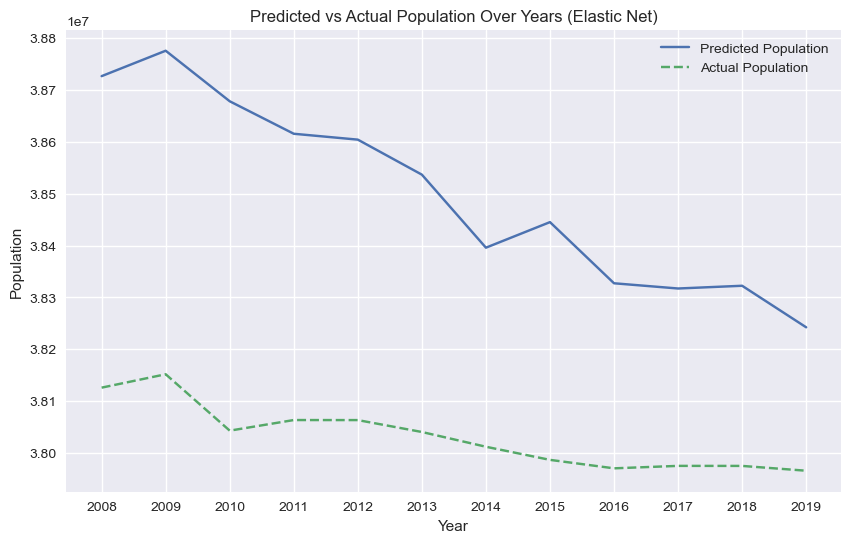

Model: Bayesian Ridge
Prediction: [39647186.41729562 39728222.10706081 39809257.79512526 39832542.95883237
 39855828.12261947 39879113.28583305 39902398.44850715 39925683.61295209
 39925683.61185066 39925683.61158323 39925683.61147355 39925683.61084979]
Coefficients: [-5.05891286e+00  2.48058003e-04 -1.07574867e-03  2.09864401e-03
  2.68901569e-03]
Len: 12
Mean Squared Error: 3355054233664.319
R-squared: -946.1904307127998
Mean Absolute Percentage Error: 0.04802150448112638



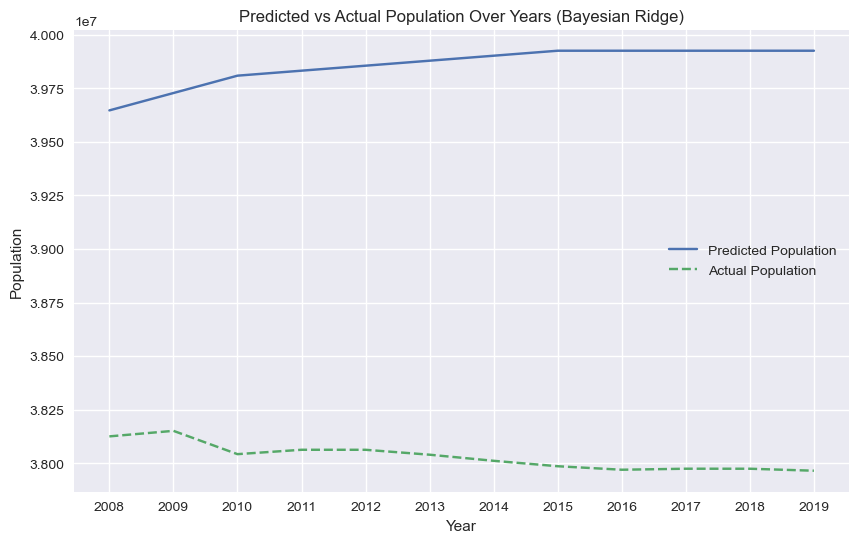

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import BayesianRidge, ElasticNet, HuberRegressor, LinearRegression, Ridge, Lasso, SGDRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_percentage_error
X=final_data.drop(columns='Population')
y=final_data['Population']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
train_size = int(len(X) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Elastic Net": ElasticNet(),
    "Bayesian Ridge": BayesianRidge()
}
for name, model in models.items():
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape=mean_absolute_percentage_error(y_test, y_pred)

    print(f"Model: {name}")
    print(f"Prediction: {y_pred}")
    print(f"Coefficients: {model.coef_}")
    print(f"Len: {len(y_pred)}")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")
    print(f"Mean Absolute Percentage Error: {mape}")
    print("")
    df_pred = X_test.copy()
    df_pred['Predicted Population'] = y_pred
    df_pred['Actual Population'] = y_test
    
    df_pred = df_pred.sort_values('Year')
    plt.figure(figsize=(10, 6))
    plt.plot(df_pred.index, df_pred['Predicted Population'], label='Predicted Population')
    plt.plot(df_pred.index, y[-12:], label='Actual Population', linestyle='dashed')
    plt.xlabel('Year')
    plt.ylabel('Population')
    plt.title(f'Predicted vs Actual Population Over Years ({name})')
    plt.legend()
    plt.show()


## Results are rather unsuprising.
Let us also see whether changing the year divide (12 years to 20 years for predicting) will impact the results.

Model: Linear Regression
Prediction: [39032096.09407715 39174924.25087472 39319205.00968354 39469414.09868119
 39494658.32652447 39604908.30569756 39717403.54084397 39830820.74593689
 39936970.77952589 40152398.387837   40230030.3903149  40309306.24977536
 40382768.59069592 40480481.63741446 40529429.71847516 40572102.32837366
 40598410.50994397 40615321.73197553 40604784.89476629 40651977.36992923
 40615905.52154223 40596971.52441567 40605317.28114176 40603757.37907133]
Len: 24
Mean Squared Error: 4315499781496.537
R-squared: -84.63108725670544
Mean Absolute Percentage Error: 0.05096596659670217



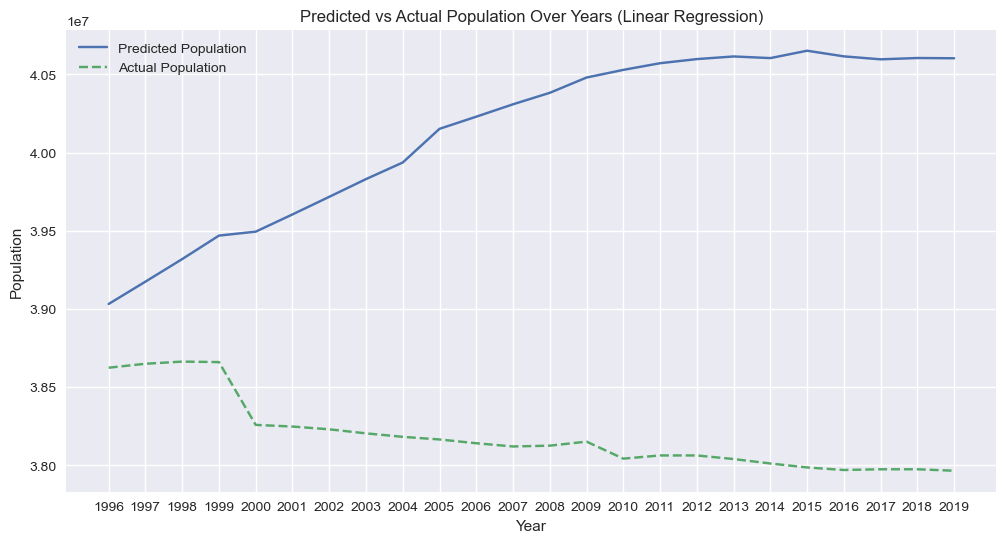

Model: Ridge Regression
Prediction: [39023617.69129948 39170077.61754999 39317934.71103848 39463473.94449914
 39512484.34219077 39629393.91785408 39744374.75774656 39857987.29655849
 39974450.3939313  40196012.08314794 40284272.31550641 40374235.07816908
 40470411.43991285 40576131.89796934 40645827.41239095 40691551.47703442
 40721741.26341953 40742936.76009941 40755464.5199724  40800825.76732788
 40787052.60991317 40779410.91875635 40783011.34957159 40789019.37201817]
Len: 24
Mean Squared Error: 4731570851514.711
R-squared: -92.88705293986479
Mean Absolute Percentage Error: 0.053115665674531964



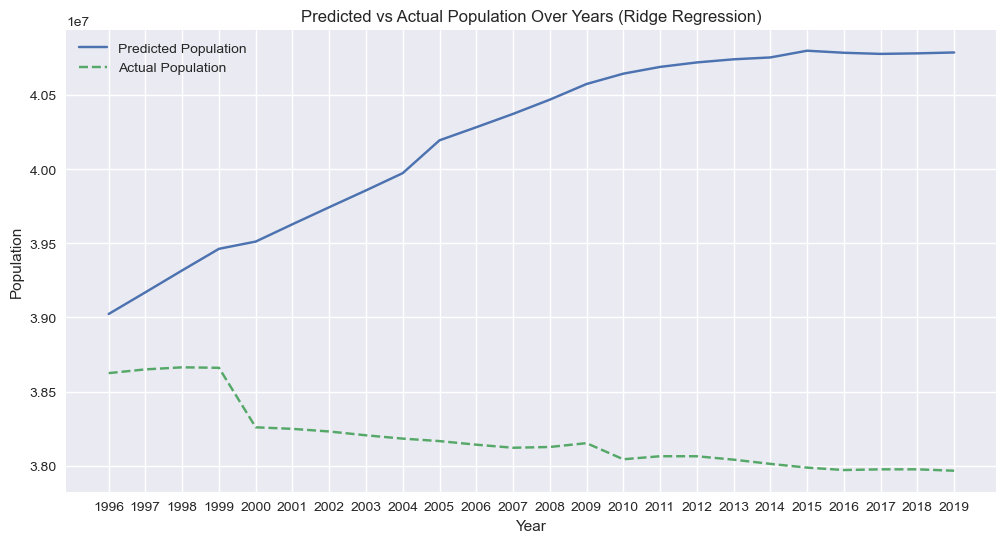

Model: Lasso Regression
Prediction: [39032095.34207544 39174928.02609057 39319213.07419855 39469419.13800633
 39494684.14054613 39604941.01627178 39717439.44446668 39830857.22833999
 39937016.06935041 40152448.87566409 40230089.62877153 40309374.10415772
 40382854.99424306 40480574.86561716 40529541.05595982 40572217.8908763
 40598529.51529024 40615445.28819641 40604928.31969979 40652119.18564951
 40616065.80073991 40597140.13282256 40605482.09435327 40603929.31857161]
Len: 24
Mean Squared Error: 4315895972942.5845
R-squared: -84.63894875734375
Mean Absolute Percentage Error: 0.050968123558282896



c:\Users\krzys\miniconda3\envs\msid\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.396e+11, tolerance: 2.854e+10
  model = cd_fast.enet_coordinate_descent(


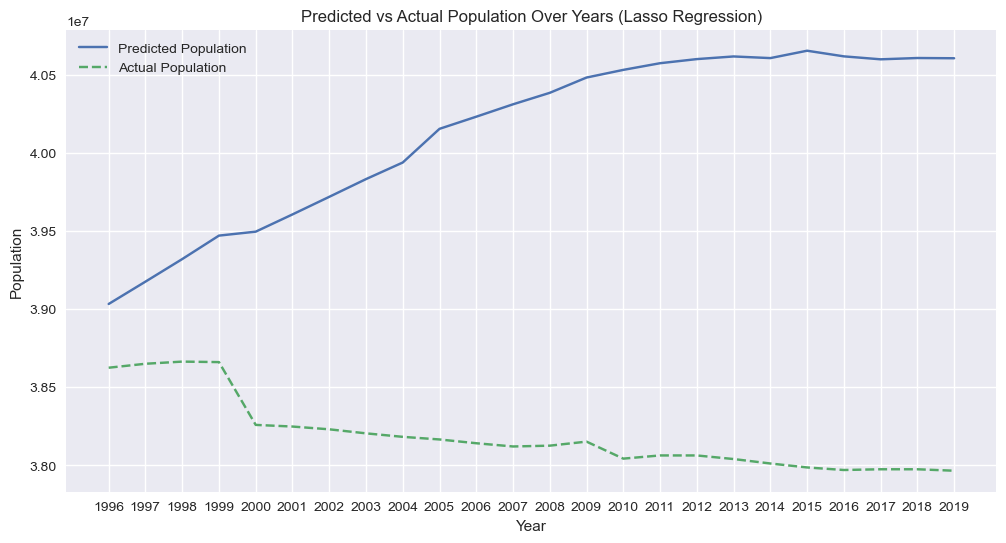

Model: Elastic Net
Prediction: [39043458.4862376  39193142.32306247 39343920.81535104 39489120.56909598
 39562360.12726937 39682166.97280926 39798517.06531721 39913008.80353843
 40033291.72805272 40242691.88212867 40334525.92323316 40427682.36529557
 40529956.67455197 40635844.58441463 40715086.29074122 40759399.04750498
 40789112.3871612  40811626.36924831 40834026.12451466 40874393.13436908
 40869894.1302279  40865741.2377632  40865537.37249276 40872731.67294664]
Len: 24
Mean Squared Error: 4999342462610.974
R-squared: -98.20035970747657
Mean Absolute Percentage Error: 0.05464116234184104



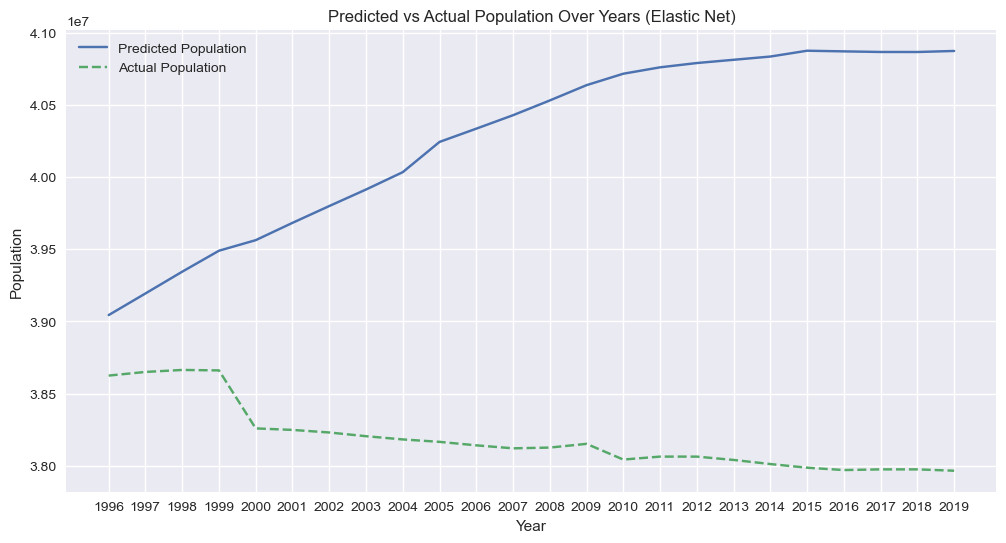

Model: Bayesian Ridge
Prediction: [39283313.73537213 39451973.79760953 39620633.85993452 39789293.92177844
 39957953.97793926 40082195.57295772 40206437.16768368 40330678.7623031
 40454920.35736517 40579161.95957201 40676013.85860728 40772865.75774122
 40869717.65755618 40966569.55770209 41063421.45566834 41091251.32277593
 41119081.18864119 41146911.05393438 41174740.91928093 41202570.78597991
 41202570.78556196 41202570.78512695 41202570.78496353 41202570.78544169]
Len: 24
Mean Squared Error: 6551929205727.56
R-squared: -129.00784380085219
Mean Absolute Percentage Error: 0.06355081329695587



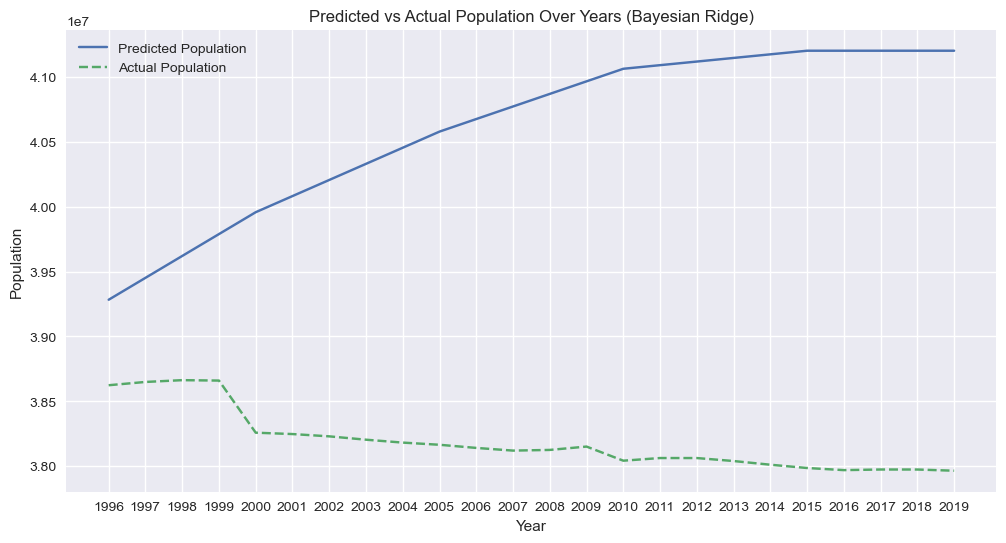

In [20]:
X=final_data.drop(columns='Population')
y=final_data['Population']
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
train_size = int(len(X) * 0.6)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(),
    "Lasso Regression": Lasso(),
    "Elastic Net": ElasticNet(),
    "Bayesian Ridge": BayesianRidge()
}
for name, model in models.items():
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape=mean_absolute_percentage_error(y_test, y_pred)

    print(f"Model: {name}")
    print(f"Prediction: {y_pred}")
    print(f"Len: {len(y_pred)}")
    print(f"Mean Squared Error: {mse}")
    print(f"R-squared: {r2}")
    print(f"Mean Absolute Percentage Error: {mape}")
    print("")
    df_pred = X_test.copy()
    df_pred['Predicted Population'] = y_pred
    df_pred['Actual Population'] = y_test
    
    df_pred = df_pred.sort_values('Year')
    plt.figure(figsize=(12, 6))
    plt.plot(df_pred.index, df_pred['Predicted Population'], label='Predicted Population')
    plt.plot(df_pred.index, y[-24:], label='Actual Population', linestyle='dashed')
    plt.xlabel('Year')
    plt.ylabel('Population')
    plt.title(f'Predicted vs Actual Population Over Years ({name})')
    plt.legend()
    plt.show()

# Changing the train subset yields interesting results.
The accuracy of some models has increased, while for others it has decreased. This proves that parameters of simulations for models can greatly impact the output.


# Summary
Lasso regression model seems to be the best model for this sort of prediction. The diffrences between algorithims were quite vast, with some faring much better than the other. <br>
On top of that, models were rather innacurate. This further proves that predicting population is a very complicated task, that is based on many variables and getting accurate results is quite a challange.
# Potential Improvements
The prediction models can definetly benefit from adding even more diverse variables, such as religion, total houshold incone and many more.<br> On top of that, more interesting models and ways to split data could potentially be used in order to get better results.<br> Extending data all the way to around 1948 would also give the model bigger trainset, and thus improving it.<br>
Interpolation could also be improved, as well as first years of historic population changes, which were set to zero.